**Aim: Apply transfer learning with pre-trained VGG16 model on assignment 3 and analyze the result.**

Objectives: 
1. To learn pre-trained models 
2. To learn transfer learning

Theory: 

Transfer learning 
Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing 
knowledge gained while solving one problem and applying it to a different but related problem. For 
example, knowledge gained while learning to recognize cars could apply when trying to recognize 
trucks. This area of research bears some relation to the long history of psychological literature 
on transfer of learning, although formal ties between the two fields are limited. From the practical 
standpoint, reusing or transferring information from previously learned tasks for the learning of new 
tasks has the potential to significantly improve the sample efficiency of a reinforcement 
learning agent.  
ResNet 50 
1. Use 3*3 filters mostly. 
2. Down sampling with CNN layers with stride 2. 
3. Global average pooling layer and a 1000-way fully-connected layer with Softmax in the 
end. 


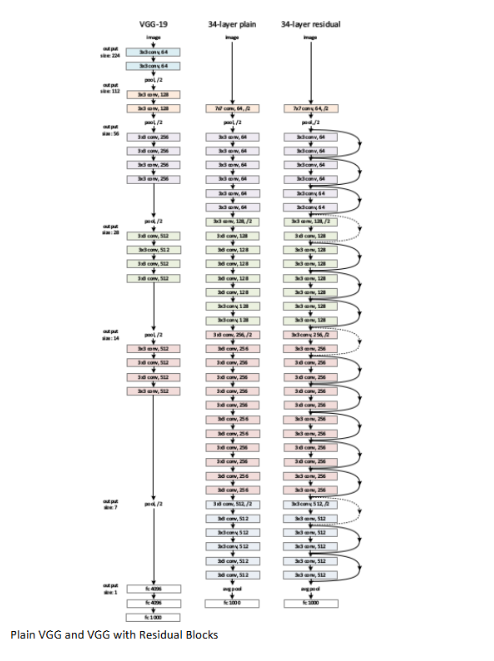

There are two kinds of residual connections:

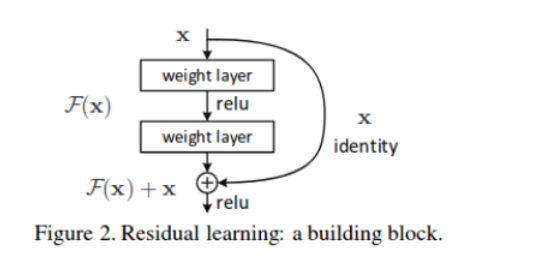


Residual block 
1. The identity shortcuts (x) can be directly used when the input and output are of the 
same dimensions. 

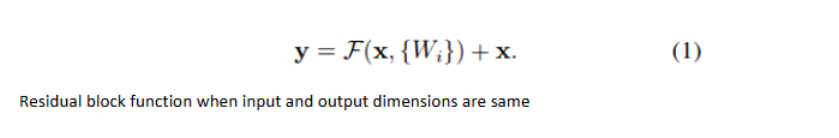

2. When the dimensions change, A) The shortcut still performs identity mapping, with extra zero 
entries padded with the increased dimension. B) The projection shortcut is used to match the 
dimension (done by 1*1 conv) using the following formula 

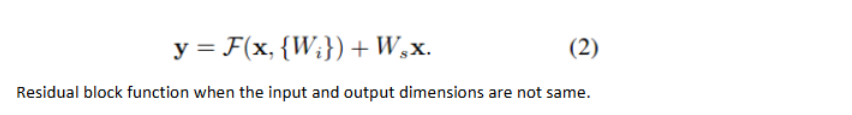

The first case adds no extra parameters, the second one adds in the form of W_{s} 

MOBILENET 

MobileNet is an efficient and portable CNN architecture that is used in real world applications. 
MobileNets primarily use depthwise seperable convolutions in place of the standard 
convolutions used in earlier architectures to build lighter models.MobileNets introduce two new 
global hyperparameters(width multiplier and resolution multiplier) that allow model developers to 
trade off latency or accuracy for speed and low size depending on their requirements.

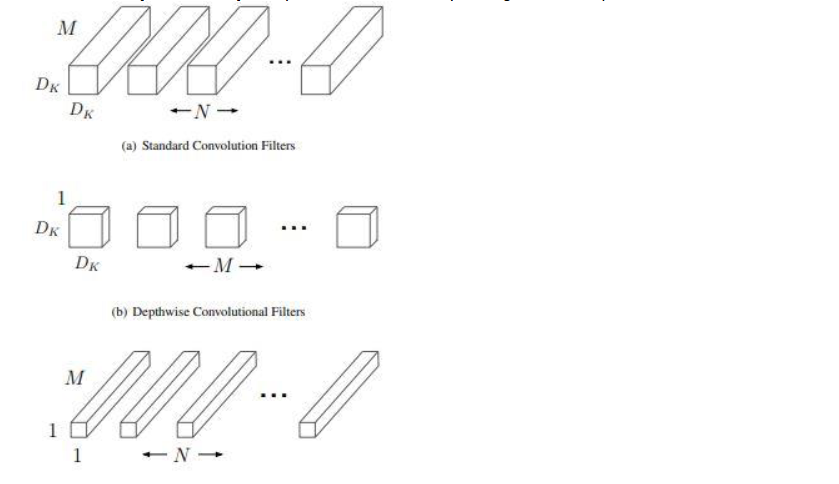

Architecture 

MobileNets are built on depthwise seperable convolution layers.Each depthwise seperable 
convolution layer consists of a depthwise convolution and a pointwise convolution.Counting 
depthwise and pointwise convolutions as seperate layers, a MobileNet has 28 layers.A standard 
MobileNet has 4.2 million parameters which can be further reduced by tuning the width multiplier 
hyperparameter appropriately. 
The size of the input image is 224 × 224 × 3. 
The detailed architecture of a MobileNet is given below : 

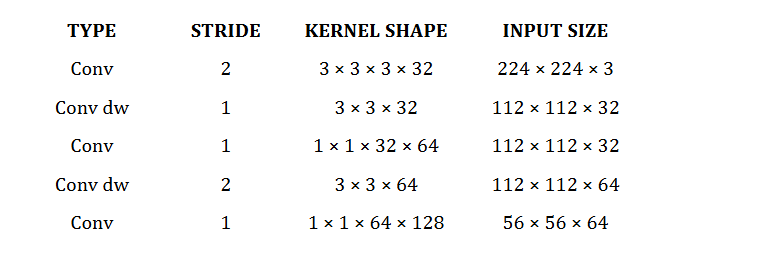


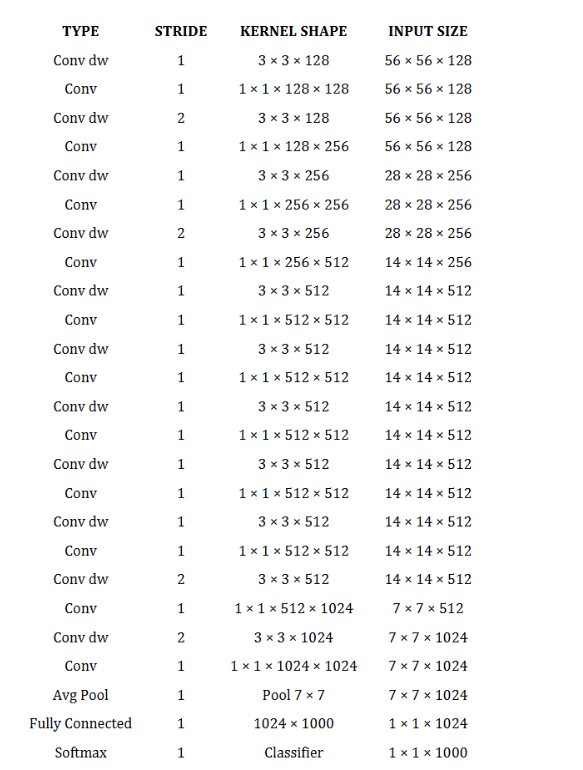

Standard Convoltion layer : 

A single standard convolution unit (denoted by Conv in the table above) looks like this : 

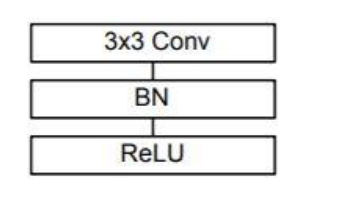

Depthwise seperable Convolution layer 

A single Depthwise seperable convolution unit (denoted by Conv dw in the table above) looks 
like this :

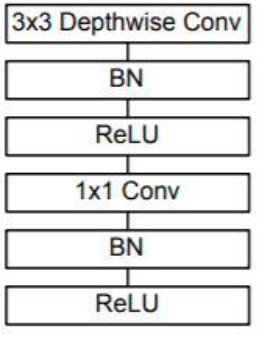

VGG16 

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the 
University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image 
Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 
14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-
2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the 
first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after 
another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s. 

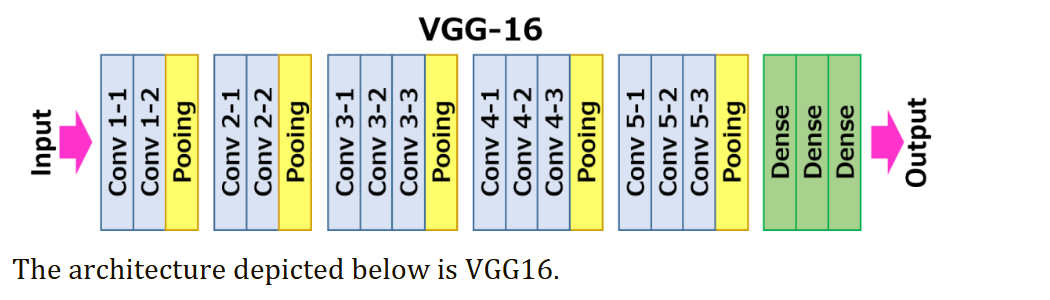

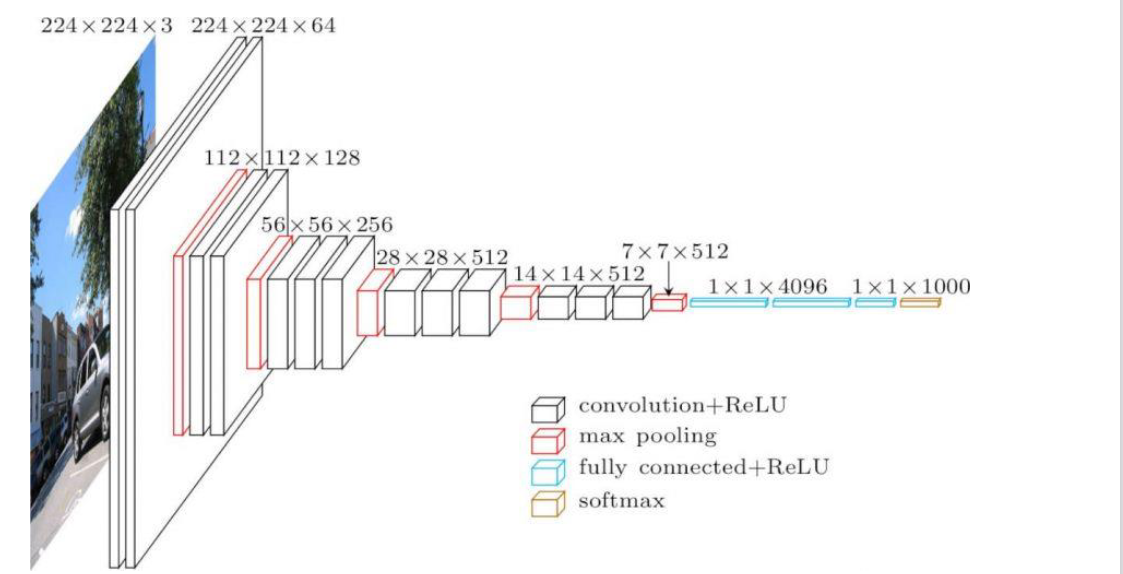

VGG16 Architecture 

The input to cov1 layer is of fixed size 224 x 224 RGB image. The image is passed through a stack of 
convolutional (conv.) layers, where the filters were used with a very small receptive field: 3×3 (which 
is the smallest size to capture the notion of left/right, up/down, center). In one of the configurations, 
it also utilizes 1×1 convolution filters, which can be seen as a linear transformation of the input 
channels (followed by non-linearity). The convolution stride is fixed to 1 pixel; the spatial padding of 
conv. layer input is such that the spatial resolution is preserved after convolution, i.e. the padding is 
1-pixel for 3×3 conv. layers. Spatial pooling is carried out by five max-pooling layers, which follow 
some of the conv.  layers (not all the conv. layers are followed by max-pooling). Max-pooling is 
performed over a 2×2 pixel window, with stride 2. 
Three Fully-Connected (FC) layers follow a stack of convolutional layers (which has a different depth 
in different architectures): the first two have 4096 channels each, the third performs 1000-way 
ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-
max layer. The configuration of the fully connected layers is the same in all networks.

Code:

In [1]:
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import models,Sequential,layers,preprocessing 
import os 
from tensorflow.keras.applications.vgg16 import VGG16 

In [6]:
base=VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet') 
base.trainable=False 
model=models.Sequential() 
model.add(base) 
model.add(layers.Flatten()) 
model.add(layers.Dense(120,activation="relu")) 
model.add(layers.Dense(2,activation="softmax")) 

In [7]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])